<a href="https://colab.research.google.com/github/JiwonHae94/Tensorflow/blob/main/TensorFlowCore_BasicTrainingLoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
## Obtain training data
TRUE_W = 3.0
TRUE_B = 2.0 

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2, 2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W * TRUE_B

# Generate noise 
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Caculate y
y = f(x) + noise

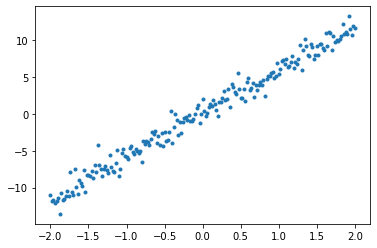

In [5]:
# Plot all the data
plt.plot(x, y, ".")
plt.show()

In [11]:
######################################## 
# Model Definition
# tf.Variable to represent all weights in a model. A tf.Variable stores a value and provides this in tensor form as needed. See the variable guide for more details.
# tf.Module to encapsulate the variables and the computation. 
########################################
class MyModel(tf.Module):
  def __init__(self,  **kwargs):
    super().__init__(**kwargs)

    # initialize the weights to 5.0 and the bias to 0.0
    # In practice, tehse should be randomly initialized

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.module's built-in variable aggregation
print("Variables", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


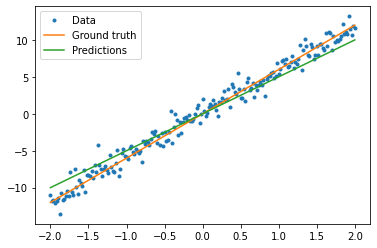

Current loss: 2.008795


In [12]:
# Loss Function Defition
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

# visualize loss function
plt.plot(x, y, ".", label ="Data")
plt.plot(x, f(x), label = "Ground truth")
plt.plot(x, model(x), label ="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

In [37]:
# Training loop definition
# training loop contains 3 repetitive tasks in order:
# 1. send batch of inputs through the model to generate outputs
# 2. calculate loss by copmaring the outputs to the output (or label)
# 3. use gradient tape to find the gradients
# 4. optimize variables with the gradient found
def train(model, x, y, learning_rate):
  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [38]:
model = MyModel()

# collect history of W-values and b-values to plot
weights = []
biases = []
epochs = range(10)

# Define a training loop
def report(mode, loss):
  return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"

def training_loop(model, x, y):
  for epoch in epochs:
    #Update the model with teh single giant batch
    train(model, x, y, learning_rate = 0.1)

    # Track this before I update
    weights.append(model.w.numpy())
    biases.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print(f"Epoch {epoch:2d}:")
    print("         ", report(model, current_loss))

In [39]:
# Perform training
current_loss = loss(y, model(x))

print(f"Starting:")
print("         ", report(model, current_loss))

training_loop(model, x, y)

Starting:
          W = 5.00, b = 0.00, loss=2.00880
Epoch  0:
          W = 5.24, b = 0.03, loss=1.52262
Epoch  1:
          W = 5.41, b = 0.05, loss=1.26227
Epoch  2:
          W = 5.53, b = 0.07, loss=1.12277
Epoch  3:
          W = 5.62, b = 0.08, loss=1.04797
Epoch  4:
          W = 5.69, b = 0.10, loss=1.00782
Epoch  5:
          W = 5.74, b = 0.11, loss=0.98626
Epoch  6:
          W = 5.78, b = 0.11, loss=0.97466
Epoch  7:
          W = 5.80, b = 0.12, loss=0.96842
Epoch  8:
          W = 5.82, b = 0.12, loss=0.96505
Epoch  9:
          W = 5.84, b = 0.13, loss=0.96323


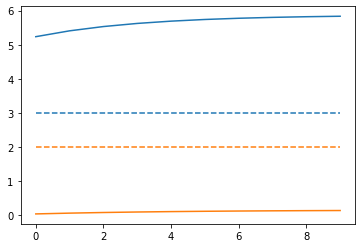

In [40]:
# plot evolution of the weights 
plt.plot(epochs, weights, label='Weights', color=colors[0])
plt.plot(epochs, [TRUE_W] * len(epochs), '--',
         label = "True weight", color=colors[0])

plt.plot(epochs, biases, label='bias', color=colors[1])
plt.plot(epochs, [TRUE_B] * len(epochs), "--",
         label="True bias", color=colors[1])

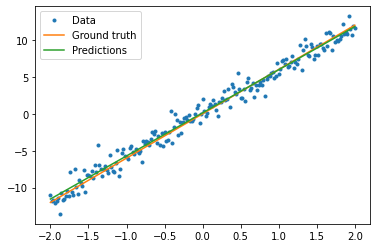

Current loss: 0.963228


In [42]:
# visulaize performance
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())


In [43]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("my_checkpoint")

Epoch  0:
          W = 5.84, b = 0.13, loss=1.52262
Epoch  1:
          W = 5.84, b = 0.13, loss=1.26227
Epoch  2:
          W = 5.84, b = 0.13, loss=1.12277
Epoch  3:
          W = 5.84, b = 0.13, loss=1.04797
Epoch  4:
          W = 5.84, b = 0.13, loss=1.00782
Epoch  5:
          W = 5.84, b = 0.13, loss=0.98626
Epoch  6:
          W = 5.84, b = 0.13, loss=0.97466
Epoch  7:
          W = 5.84, b = 0.13, loss=0.96842
Epoch  8:
          W = 5.84, b = 0.13, loss=0.96505
Epoch  9:
          W = 5.84, b = 0.13, loss=0.96323


In [44]:
keras_model = MyModelKeras()

# compile sets the training param
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly = False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)

In [45]:
# Keras fit expects batched data or a copmlete dataset as a NumPy array
print(x.shape[0])
keras_model.fit(x, y, epochs = 10, batch_size = 1000)

201
Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.0088
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 1.5226
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1.2623
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 1.1228
Epoch 5/10
1/1 [==============================] - 0s 15ms/step - loss: 1.0480
Epoch 6/10
1/1 [==============================] - 0s 20ms/step - loss: 1.0078
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 0.9863
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 0.9747
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.9684
Epoch 10/10
1/1 [==============================] - 0s 21ms/step - loss: 0.9650
